In [1]:
import pandas as pd
import datetime
import numpy as np
import re
from re import search

In [2]:
with open("log.txt", 'r') as infile, open('subor.txt', 'w') as outfile:
    logFile = infile.read()
    logFile = logFile.replace("-", "")
    logFile = logFile.replace(" +0200", "+0200")
    logFile = logFile.replace(" +0100", "+0100")
    logFile = logFile.replace(" /", "/")
    logFile = logFile.replace(" HTTP", "HTTP")
    logFile = logFile.replace("   ", " ")
    outfile.write(logFile)

In [3]:
colNames = ["eshop", "IP", "DateTime", "URL", "ResponseCode", "Bytes", "Referrer", "UserAgent", "9", "10", "11", "12"]
df = pd.read_csv("subor.txt", sep=" ", names=colNames)

In [4]:
df.drop(['eshop','9', '10','11','12'], axis=1, inplace=True)

In [5]:
len(df)

1921736

# Predspracovanie dát


In [6]:
df['Referrer'].fillna("-",inplace=True)

In [7]:
# odstranenie navratovych kodov s hodnotamy 4xx, 5xx, 1xx
df["ResponseCode"]= df["ResponseCode"].apply(str) 
delete = ["1", "4", "5"]
df = df[~df["ResponseCode"].str[:1].str.contains('|'.join(delete))]

In [8]:
len(df) # po odstraneni navratovych kodov

1864359

In [9]:
#odstranenie poziadaviek na obrazky, styly atd.
df["URL"]= df["URL"].apply(str) 
delete = ["POST", "HEAD",".bmp", ".jpg", ".jpeg", ".png", ".gif", ".JPG", ".css", ".flv", ".ico", ".swf"
                       , ".rss", ".xml", ".cur", ".js", ".json", ".svg", ".woff", ".eot"]
df = df[~df["URL"].str.contains('|'.join(delete))]

In [10]:
len(df) # po odstraneni obrazkov stylov..

236605

### odstranenie robotov

In [11]:
#odstranenie url adries ktore obsahuju navbar, cron
for x in df['URL']:
        if re.search("navbar",x) or re.search("cron",x):
          df.drop(df.index[df['URL'] == x], inplace = True)

In [12]:
#identifikacia ip robotov
data=df[df['URL'].str.contains("robots.txt")]
roboty=pd.unique(data['IP'])

In [13]:
len(roboty) # ipcky robotov

967

In [15]:
len(df) # po odstraneni navbar a cron

191745

In [19]:
#odstranenie ip robotov
for x in df['IP']:
    for y in roboty:
        if x==y:
            df.drop(df.index[df['IP'] == x], inplace = True)

In [20]:
len(df)

146165

In [22]:
df['UserAgent']=df['UserAgent'].apply(str)
for x in df['UserAgent']:
    if re.search("bot",x) or re.search("crawl",x) or re.search("spider",x):
        df.drop(df.index[df['UserAgent'] == x], inplace = True)  


In [23]:
len(df) # po odstraneni bot crawler, ip roboov

102070

## Čistenie od prístupov admina a ďalších nepotrebných prístupov

In [24]:
#ip adminov
df["URL"]= df["URL"].apply(str) 
data1=df[df['URL'].str.contains("admin")]
z=pd.unique(data1['IP'])

In [25]:
len(z)

148

In [29]:
len(data1)

3411

In [32]:
df[~df['URL'].str.contains("admin")]

,IP,DateTime,URL,ResponseCode,Bytes,Referrer,UserAgent
10,109.70.100.35,[30/Mar/2022:00:04:25+0200],GET/myaccount/HTTP/2.0,200.0,17628.0,-,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
77,109.70.100.35,[30/Mar/2022:00:05:05+0200],GET/myaccount/HTTP/2.0,200.0,17627.0,-,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...
83,185.61.222.181,[30/Mar/2022:00:06:17+0200],GET/faq/HTTP/1.1,200.0,21347.0,https://your20th.com/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5...
90,194.104.11.194,[30/Mar/2022:00:07:32+0200],GET/faq/HTTP/1.1,200.0,21349.0,https://your20th.com/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5...
135,45.148.233.140,[30/Mar/2022:00:18:36+0200],GET/faq/HTTP/1.1,200.0,21349.0,https://your20th.com/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5...
...,...,...,...,...,...,...,...
1921687,46.161.11.103,[04/Apr/2022:22:47:53+0200],GET/shop/spaceagecopperhangingchandeliergerman...,302.0,260.0,http://your20th.com/shop/spaceagecopperhanging...,Mozilla/5.0 (Windows NT 6.3; Win64; x64) Apple...
1921689,46.161.11.103,[04/Apr/2022:22:47:55+0200],GET/shop/spaceagecopperhangingchandeliergerman...,200.0,166314.0,https://your20th.com/shop/spaceagecopperhangin...,Mozilla/5.0 (Windows NT 6.3; Win64; x64) Apple...
1921706,198.12.122.116,[04/Apr/2022:22:53:48+0200],GET/HTTP/1.0,302.0,205.0,http://your20th.com/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_2...
1921707,198.12.122.116,[04/Apr/2022:22:53:51+0200],GET/HTTP/1.0,200.0,188507.0,http://your20th.com/,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_2...


In [39]:
for x in df['URL']:
    if re.search("admin",x) :
        df.drop(df.index[df['URL'] == x], inplace = True)  

C:\Users\kalin\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [40]:
len(df) #po odstraneni admin

67035

In [41]:
#odstranenie ip adminov
for x in df['IP']:
    for y in z:
        if x==y:
            df.drop(df.index[df['IP'] == x], inplace = True)

In [42]:
len(df)  #po odstraneni adminov

63190

In [52]:
#odstranenie nechcenych poziadaviek wp
df["URL"]= df["URL"].apply(str) 
deleterows = ["GET/HTTP/", "GET/test", "GET//","env","wordpress", "ftp","backup", "GET/1","GET/2","GET/3" "wpcontent",
              "GET/.hg", "GET/.http", "GET/wpincludes", "wpconfig", "cgi", "GET/cms", "cindex","wpload", "edito", "GET/wp/", "GET/web/", "GET/wp_", "fbcl", "gcli", "GET/wso", "GET/wpi", "GET/XxX"]
df = df[~df["URL"].str.contains('|'.join(deleterows))]

In [53]:
len(df)

63157

In [54]:
df.to_excel(r'cistenie.xlsx', sheet_name = 'main', index=None)

In [ ]:
#rucne cistenie dalsich najdenych nepotrebnych pristupov v exceli

In [55]:
df= df.sort_values(['IP','UserAgent','DateTime'], ascending=True)

In [59]:
df.to_excel(r'cistenie.xlsx', sheet_name = 'main', index=None)

C:\Users\kalin\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:941: UserWarning: Ignoring URL 'https://your20th.com/jindrichhalabalagreatmanoftheeuropeanandworldfurnituredesign/index.php?action=sc_chat_ajax_callback&f_chat_user_name=Eric+Jones&f_chat_user_email=eric.jones.z.mail%40gmail.com&f_chat_user_question=Hi%2C+my+name+is+Eric+and+I%E2%80%99m+betting+you%E2%80%99d+like+your+website+your20th.com+to+generate+more+leads.%0D%0A%0D%0AHere%E2%80%99s+how:%0D%0ATalk+With+Web+Visitor+is+a+software+widget+that%E2%80%99s+works+on+your+site%2C+ready+to+capture+any+visitor%E2%80%99s+Name%2C+Email+address+and+Phone+Number.++It+signals+you+as+soon+as+they+say+they%E2%80%99re+interested+%E2%80%93+so+that+you+can+talk+to+that+lead+while+they%E2%80%99re+still+there+at+your20th.com.%0D%0A%0D%0ATalk+With+Web+Visitor+%E2%80%93+CLICK+HERE+https://jumboleadmagnet.com+for+a+live+demo+now.%0D%0A%0D%0AAnd+now+that+you%E2%80%99ve+got+their+phone+number%2C+our+new+SMS+Text+With+Lead+feature+enables+you+

# UNIXTIME


In [94]:
df1 = pd.read_excel("cistenie.xlsx")

In [95]:
import time
import datetime

In [96]:
df1["Unixtime"]= ""

In [ ]:
i=0
for x in df1["DateTime"]:
        df1.iloc[i, 7]= datetime.datetime(int(x[6:10]),int(x[3:5]),int(x[0:2]),int(x[11:13]),int(x[14:16]),int(x[17:19])).timestamp()
        i=i+1

 

In [99]:
df1

,IP,DateTime,URL,ResponseCode,Bytes,Referrer,UserAgent,Unixtime
0,1.10.194.157,02/02/2022 23:24:00+0100,GET/myaccount/HTTP/1.1,200.0,18093.0,https://your20th.com/,Mozilla/5.0 (X11; Linux x86_64; rv:56.0) Gecko...,1.64384e+09
1,1.120.202.188,30/01/2022 07:51:12+0100,GET/shop/sofabiedermeiercirca1835europe/HTTP/2.0,200.0,24140.0,https://www.google.com/,Mozilla/5.0 (iPhone; CPU iPhone OS 15_1 like M...,1.64353e+09
2,1.127.21.42,19/12/2021 05:48:45+0100,GET/producttag/german/HTTP/2.0,200.0,23801.0,https://www.google.com.au/,Mozilla/5.0 (iPhone; CPU iPhone OS 15_1_1 like...,1.63989e+09
3,1.127.21.42,19/12/2021 05:49:11+0100,GET/shop/HTTP/2.0,200.0,26846.0,https://your20th.com/producttag/german/,Mozilla/5.0 (iPhone; CPU iPhone OS 15_1_1 like...,1.63989e+09
4,1.127.21.42,19/12/2021 05:49:33+0100,GET/productcategory/furniture/HTTP/2.0,200.0,26619.0,https://your20th.com/shop/,Mozilla/5.0 (iPhone; CPU iPhone OS 15_1_1 like...,1.63989e+09
...,...,...,...,...,...,...,...,...
63152,99.85.74.115,04/01/2022 00:58:54+0100,GET/shop/midcenturyfoldingchessgametableczecho...,200.0,24715.0,https://www.google.com/,Mozilla/5.0 (iPhone; CPU iPhone OS 15_1_1 like...,1.64125e+09
63153,99.90.210.188,26/03/2022 23:59:26+0100,GET/shop/hungarianvintagefloorlamp1960s2/HTTP/2.0,200.0,25760.0,https://www.google.com/,Mozilla/5.0 (iPhone; CPU iPhone OS 15_4 like M...,1.64834e+09
63154,99.90.210.188,26/03/2022 23:59:32+0100,GET/shop/hungarianvintagefloorlamp1960s2/HTTP/2.0,200.0,25988.0,https://your20th.com/,Mozilla/5.0 (iPhone; CPU iPhone OS 15_4 like M...,1.64834e+09
63155,99.90.210.188,26/03/2022 23:59:38+0100,GET/brand/vintage/HTTP/2.0,200.0,29034.0,https://your20th.com/,Mozilla/5.0 (iPhone; CPU iPhone OS 15_4 like M...,1.64834e+09


In [100]:
df1.to_excel(r'cistenie.xlsx', sheet_name = 'main', index=None)

# Identifikacia pouzivatelov


In [102]:
df1 = pd.read_excel("cistenie.xlsx")

In [125]:
data2= df1.sort_values(['IP','UserAgent','Unixtime'], ascending=True)


In [126]:
data2["User_id"]= ""

In [127]:
data2['User_id'] = data2.groupby(['IP','UserAgent']).ngroup()

In [129]:
data2.to_excel(r'identifikacia_pouzivatelov.xlsx', sheet_name = 'main', index=None)

# Identifikácia Sedení


In [131]:
df3 = pd.read_excel("identifikacia_pouzivatelov.xlsx")

In [140]:
SequenceID = 1800
Sedenie = []
sedenie = 0
index = 0
nextIndex = 1 

#prechadzam cely subor, zoberem hodnoty stlpca id a porovnavam ich s nasledujucim riadkom ci sa rovnaju,
#a ci unixtime nasledujuceho - akt riadku je mensi ako casove okno, ak je mensi zapisem

for i in range(1,len(df3)):
    if((df3.iloc[index,8] == df3.iloc[nextIndex,8]) and ((df3.iloc[nextIndex,7] - df3.iloc[index,7]) < SequenceID)):
        Sedenie.append(sedenie)
        index+=1
        nextIndex+=1
    else:
        Sedenie.append(sedenie)
        index+=1
        nextIndex+=1
        sedenie+=1

In [141]:
Sedenie.append("")
df3["Sedenie"] = Sedenie

In [142]:
df3.to_excel("identifikacia_pouzivatelov.xlsx", sheet_name = 'main', index=None)

In [182]:
df3["User_id"].nunique()

13365

In [183]:
df3["Sedenie"].nunique()

22954

In [265]:
length = []
index = 0
nextIndex = 1
for i in range(1,len(df3)):
    if((df3.iloc[nextIndex,[8]].values == df3.iloc[index,[8]].values) and ((df3.iloc[nextIndex,[7]].values-df3.iloc[index,[7]].values) < SequenceID)):
        length.append(str(df3.iloc[nextIndex,[7]].values-df3.iloc[index,[7]].values))
        index+=1
        nextIndex+=1
    else:
        length.append("")
        index+=1
        nextIndex+=1
        
length.append("")

In [266]:
df3["Length"] = length

In [267]:
df3.to_excel("identifikacia_pouzivatelov.xlsx", sheet_name='main', index=None)

In [148]:
df3 = pd.read_excel("identifikacia_pouzivatelov.xlsx")

# Kategorizacia URL adries

In [268]:
page = []
df3["URL"]= df3["URL"].apply(str) 

for x in df3['URL']:
    if re.search("GET/home",x) or re.search("GET/your20th",x):
        page.append('home')
    elif re.search("GET/feed",x) or re.search("GET/your20th/feed",x):
        page.append('feed') 
    elif re.search("GET/comment",x):
        page.append('comments') 
    elif re.search("GET/shopHTTP",x) or re.search("GET/shopHTTP",x) or re.search("GET/shop/page",x) or re.search("productcategory",x) or re.search("GET/shop/HTTP",x) or re.search("filter_p",x) or re.search("orderby",x) or re.search("GET/page",x) or re.search("producttag",x) or re.search("GET/brand",x):
        page.append('product-catalogue')
    elif re.search("GET/shop/",x):
        page.append('product')    
    elif re.search("addtocart",x):
        page.append('add-to-cart')  
    elif re.search('add_to_wishlist',x):
        page.append('add-to-wishlist')   
    elif re.search("GET/myaccount/",x):
        page.append('my-account')
    elif re.search("GET/faq/",x):
        page.append('FAQ')
    elif re.search("GET/cart/HT",x) or re.search("GET/cartHT",x):
        page.append('cart')
    elif re.search("remove_item",x):
        page.append('remove-item')
    elif re.search("GET/wishlist",x):
        page.append('wishlist')
    elif re.search("GET/terms",x):
        page.append('terms-and-conditions')
    elif re.search("GET/aboutus",x):
        page.append('About-us')
    elif re.search("GET/blog",x) or re.search("author",x):
        page.append('blog')
    elif re.search("GET/checkout/HTTP",x):
        page.append('checkout')
    elif re.search("GET/checkoutHTTP",x):
        page.append('checkout')
    elif re.search("GET/checkout/orderreceived",x):
        page.append('order-received')
    else:
        page.append("")

In [269]:
df3["Page"] = page

In [270]:
category1 = []
for x in df3['URL']:
    
    if re.search("wardrob",x):
        category1.append('product-category/furniture/wardrobes')
        
    elif re.search("GET/shopHTTP",x) or re.search("GET/shopHTTP",x) or re.search("GET/shop/page",x) or re.search("productcategory",x) or re.search("GET/shop/HTTP",x) or re.search("filter_p",x) or re.search("orderby",x) or re.search("GET/page",x) or re.search("producttag",x) or re.search("GET/brand",x):
        category1.append("product-catalogue")

    elif re.search("catalogue",x):
        category1.append('product-category/magazines-books')

    elif re.search("map",x) or re.search("poster",x):
        category1.append('product-category/maps-posters')

    elif re.search("statuette",x) or re.search("originalflag",x):
        category1.append('product-category/statues-and-statuettes/')

    elif re.search("machine",x) or re.search("medicineball",x) or re.search("horsecollar",x):
        category1.append('product-category/toys')
#furniture/seating
    elif re.search("chair",x) or re.search("seat",x) or re.search("livingroom",x) :
        category1.append('product-category/furniture/seating')
        
    elif re.search("armchair",x):
        category1.append('product-category/furniture/seating/armchairs')
        
    elif re.search("sofa",x):
        category1.append('product-category/furniture/seating/sofas')
        
    elif re.search("pouffe",x) or re.search("stool",x):
        category1.append('product-category/furniture/seating/pouffes-and-stools')
        
    elif re.search("dining",x):
        category1.append('product-category/furniture/seating/dining-sets')

    elif re.search("bed",x):
        category1.append('product-category/furniture/bedrooms')

    elif re.search("bookcase",x) or re.search("case",x):
        category1.append('product-category/furniture/bookcases')

    elif re.search("coat",x):
        category1.append('product-category/furniture/coat-stands')

    elif re.search("dress",x):
        category1.append('product-category/furniture/dressers')

    elif re.search("mirror",x):
        category1.append('product-category/furniture/mirrors')

    elif re.search("plantstand/",x):
        category1.append('product-category/furniture/plant-stands')

    elif re.search("rug",x) or re.search("carpet",x):
        category1.append('product-category/furniture/rugs-carpets')

    elif re.search("sideboard",x) or re.search("cabinet",x) or re.search("bed",x) or re.search("chest",x) or re.search("rack",x):
        category1.append('product-category/furniture/secretaries-cabinets')

    elif re.search("shelf",x) or re.search("shelv",x) or re.search("hanger",x):
        category1.append('product-category/furniture/shelves')
#furniture/tables 
    elif re.search("coffeet",x):
        category1.append('product-category/furniture/tables/coffee-tables')
    
    elif re.search("sidetab",x):
        category1.append('product-category/furniture/tables/side-tables')
        
    elif re.search("table",x) or re.search("desk",x) or re.search("stand",x) or re.search("trolley",x):
        category1.append('product-category/furniture/tables')
        
    elif re.search("nightstand",x):
        category1.append('product-category/furniture/tables/nightstands')
#glass
    elif re.search("glass",x) or re.search("bowl",x) or re.search("telescope",x) or re.search("vase",x) or re.search("sculpture",x) or re.search("skeleton",x) or re.search("ceramic",x) or re.search("porcelain",x) or re.search("tesla",x) or re.search("globe",x) or re.search("divider",x):
        category1.append('product-category/decorative-objects')
#lighting
    elif re.search("lamp",x) or re.search("light",x):
        category1.append('product-category/lighting')
        
    elif re.search("tablelamp",x):
        category1.append('product-category/lighting/table-lamps')
        
    elif re.search("floorlamp",x):
        category1.append('product-category/lighting/floor-lamps')
        
    elif re.search("walll",x):
        category1.append('product-category/lighting/wall-lamps')   
        
    elif re.search("chandelier",x) or re.search("pendant",x):
        category1.append('product-category/lighting/chandeliers-and-pendants')
#clock
    elif re.search("clock",x):
        category1.append('product-category/clock')
#konverzia       
    elif re.search("addtocart",x):
        category1.append('add-to-cart')
    
    elif re.search("remove",x):
        category1.append('remove-item')
        
    elif re.search("GET/checkout/HTTP",x):
        category1.append('checkout')

    elif re.search("GET/checkout/orderreceived",x):
        category1.append('order-received')
    else:
        category1.append("")

In [271]:
df3["Product_category"] = category1

In [272]:
df3

,IP,DateTime,URL,ResponseCode,Bytes,Referrer,UserAgent,Unixtime,User_id,Sedenie,Length,Page,Product_category,Skuska
0,1.10.194.157,02/02/2022 23:24:00+0100,GET/myaccount/HTTP/1.1,200,18093,https://your20th.com/,Mozilla/5.0 (X11; Linux x86_64; rv:56.0) Gecko...,1643840640,0,0.0,,my-account,,
1,1.120.202.188,30/01/2022 07:51:12+0100,GET/shop/sofabiedermeiercirca1835europe/HTTP/2.0,200,24140,https://www.google.com/,Mozilla/5.0 (iPhone; CPU iPhone OS 15_1 like M...,1643525472,1,1.0,,product,product-category/furniture/seating/sofas,
2,1.127.21.42,19/12/2021 05:48:45+0100,GET/producttag/german/HTTP/2.0,200,23801,https://www.google.com.au/,Mozilla/5.0 (iPhone; CPU iPhone OS 15_1_1 like...,1639889325,2,2.0,[26],product-catalogue,product-catalogue,3
3,1.127.21.42,19/12/2021 05:49:11+0100,GET/shop/HTTP/2.0,200,26846,https://your20th.com/producttag/german/,Mozilla/5.0 (iPhone; CPU iPhone OS 15_1_1 like...,1639889351,2,2.0,[22],product-catalogue,product-catalogue,3
4,1.127.21.42,19/12/2021 05:49:33+0100,GET/productcategory/furniture/HTTP/2.0,200,26619,https://your20th.com/shop/,Mozilla/5.0 (iPhone; CPU iPhone OS 15_1_1 like...,1639889373,2,2.0,[10],product-catalogue,product-catalogue,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62961,99.66.19.51,29/03/2022 12:27:20+0200,GET/shop/harveyguzzinimushroomadjustablelamp19...,200,25596,https://your20th.com/shop/harveyguzzinimushroo...,Mozilla/5.0 (iPhone; CPU iPhone OS 15_3_1 like...,1648549640,13362,22951.0,,product,product-category/furniture/tables,
62962,99.85.74.115,04/01/2022 00:58:54+0100,GET/shop/midcenturyfoldingchessgametableczecho...,200,24715,https://www.google.com/,Mozilla/5.0 (iPhone; CPU iPhone OS 15_1_1 like...,1641254334,13363,22952.0,,product,product-category/furniture/tables,
62963,99.90.210.188,26/03/2022 23:59:26+0100,GET/shop/hungarianvintagefloorlamp1960s2/HTTP/2.0,200,25760,https://www.google.com/,Mozilla/5.0 (iPhone; CPU iPhone OS 15_4 like M...,1648335566,13364,22953.0,[6],product,product-category/lighting,22954
62964,99.90.210.188,26/03/2022 23:59:32+0100,GET/shop/hungarianvintagefloorlamp1960s2/HTTP/2.0,200,25988,https://your20th.com/,Mozilla/5.0 (iPhone; CPU iPhone OS 15_4 like M...,1648335572,13364,22953.0,[6],product,product-category/lighting,


In [274]:
df3.to_excel("kategorizacia.xlsx", sheet_name="main", index=None)

In [275]:
kategorizacia = pd.read_excel("kategorizacia.xlsx")

In [276]:
page = []
kategorizacia['URL'].apply(str)

for x in kategorizacia['URL']:
    if re.search("GET/home",x) or re.search("GET/your20th",x):
        page.append('home')
    elif re.search("GET/feed",x) or re.search("GET/your20th/feed",x):
        page.append('feed') 
    elif re.search("GET/comment",x):
        page.append('comments') 
    elif re.search("GET/shopHTTP",x) or re.search("GET/shopHTTP",x) or re.search("GET/shop/page",x) or re.search("productcategory",x) or re.search("GET/shop/HTTP",x) or re.search("filter_p",x) or re.search("orderby",x) or re.search("GET/page",x) or re.search("producttag",x) or re.search("GET/brand",x):
        page.append("product-catalogue")
    elif re.search("addtocart",x):
        page.append('add-to-cart')  
    elif re.search('add_to_wishlist',x):
        page.append('add-to-wishlist')   
    elif re.search("GET/myaccount/",x):
        page.append('my-account')
    elif re.search("GET/faq/",x):
        page.append('FAQ')
    elif re.search("GET/cart/",x):
        page.append('cart')
    elif re.search("GET/wishlist",x):
        page.append('wishlist')
    elif re.search("GET/terms",x):
        page.append('terms-and-conditions')
    elif re.search("GET/aboutus",x):
        page.append('About-us')
    elif re.search("GET/blog",x) or re.search("author",x):
        page.append('blog')
    elif re.search("GET/checkout/HTTP",x):
        page.append('checkout')
    elif re.search("GET/checkout/orderreceived",x):
        page.append('order-received')
    
    elif re.search("productcategory",x) or re.search("producttag",x):
        page.append("product-catalogue")
        
    elif re.search("wardrob",x):
        page.append('product-category/furniture/wardrobes')

    elif re.search("catalogue",x):
        page.append('product-category/magazines-books')

    elif re.search("map",x) or re.search("poster",x):
        page.append('product-category/maps-posters')

    elif re.search("statuette",x) or re.search("originalflag",x):
        page.append('product-category/statues-and-statuettes/')

    elif re.search("machine",x) or re.search("medicineball",x) or re.search("horsecollar",x):
        page.append('product-category/toys')
#furniture/seating
    elif re.search("chair",x) or re.search("seat",x) or re.search("livingroom",x) :
        page.append('product-category/furniture/seating')
        
    elif re.search("armchair",x):
        page.append('product-category/furniture/seating/armchairs')
        
    elif re.search("sofa",x):
        page.append('product-category/furniture/seating/sofas')
        
    elif re.search("pouffe",x) or re.search("stool",x):
        page.append('product-category/furniture/seating/pouffes-and-stools')
        
    elif re.search("dining",x):
        page.append('product-category/furniture/seating/dining-sets')

    elif re.search("bed",x):
        page.append('product-category/furniture/bedrooms')

    elif re.search("bookcase",x) or re.search("case",x):
        page.append('product-category/furniture/bookcases')

    elif re.search("coat",x):
        page.append('product-category/furniture/coat-stands')

    elif re.search("dress",x):
        page.append('product-category/furniture/dressers')

    elif re.search("mirror",x):
        page.append('product-category/furniture/mirrors')

    elif re.search("plantstand/",x):
        page.append('product-category/furniture/plant-stands')

    elif re.search("rug",x) or re.search("carpet",x):
        page.append('product-category/furniture/rugs-carpets')

    elif re.search("sideboard",x) or re.search("cabinet",x) or re.search("bed",x) or re.search("chest",x) or re.search("rack",x):
        page.append('product-category/furniture/secretaries-cabinets')

    elif re.search("shelf",x) or re.search("shelv",x) or re.search("hanger",x):
        page.append('product-category/furniture/shelves')
#furniture/tables 
    elif re.search("coffeet",x):
        page.append('product-category/furniture/tables/coffee-tables')
    
    elif re.search("sidetab",x):
        page.append('product-category/furniture/tables/side-tables')
        
    elif re.search("table",x) or re.search("desk",x) or re.search("stand",x) or re.search("trolley",x):
        page.append('product-category/furniture/tables')
        
    elif re.search("nightstand",x):
        page.append('product-category/furniture/tables/nightstands')
#glass
    elif re.search("glass",x) or re.search("bowl",x) or re.search("telescope",x) or re.search("vase",x) or re.search("sculpture",x) or re.search("skeleton",x) or re.search("ceramic",x) or re.search("porcelain",x) or re.search("tesla",x) or re.search("globe",x) or re.search("divider",x):
        page.append('product-category/decorative-objects')
#lighting
    elif re.search("lamp",x) or re.search("light",x):
        page.append('product-category/lighting')
        
    elif re.search("tablelamp",x):
        page.append('product-category/lighting/table-lamps')
        
    elif re.search("floorlamp",x):
        page.append('product-category/lighting/floor-lamps')
        
    elif re.search("walll",x):
        page.append('product-category/lighting/wall-lamps')   
        
    elif re.search("chandelier",x) or re.search("pendant",x):
        page.append('product-category/lighting/chandeliers-and-pendants')
#clock
    elif re.search("clock",x):
        page.append('product-category/clock')
        
    elif re.search("login",x):
        page.append('login')
        
    elif re.search("remove",x):
        page.append('remove-item')
    
#konverzia       
    elif re.search("addtocart",x):
        page.append('add-to-cart')
    
    elif re.search("remove",x):
        page.append('remove-item')
        
    elif re.search("GET/checkout/HTTP",x):
        page.append('checkout')

    elif re.search("GET/checkout/orderreceived",x):
        page.append('order-recieved')
    else:
        page.append("")

In [277]:
kategorizacia["Vsetko"] = page

In [278]:
kategorizacia.to_excel("kategorizacia.xlsx", sheet_name="main", index=None)

# rozdelenie datasetu na konverzie
## - add to cart
## - add to wishlist
## - order received

In [316]:
kategorizacia = pd.read_excel("kategorizacia.xlsx")

In [337]:
#add_to_cart
a = kategorizacia[kategorizacia["Page"]== "add-to-cart"]
ip = a["User_id"].unique()
df_final = kategorizacia[kategorizacia['User_id'].isin(ip)]

In [340]:
df_final.to_excel("add_to_cart.xlsx", sheet_name="main", index=None)

In [341]:
#add_to_wishlist
b = kategorizacia[kategorizacia["Page"]== "add-to-wishlist"]
ip = b["User_id"].unique()
wishlist = kategorizacia[kategorizacia['User_id'].isin(ip)]

In [342]:
wishlist.to_excel("add_to_wishlist.xlsx", sheet_name="main", index=None)

In [347]:
#order_received
a = kategorizacia[kategorizacia["Page"]== "order-received"]
ip = a["User_id"].unique()
order = kategorizacia[kategorizacia['User_id'].isin(ip)]

In [351]:
order["User_id"].nunique()

26

In [352]:
order.to_excel("order_received.xlsx", sheet_name="main", index=None)

# Exploračná analýza

In [288]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [289]:
pristupy = pd.read_excel("kategorizacia.xlsx")

In [358]:
list_of_words= pristupy['Product_category']
from collections import Counter
c = Counter(list_of_words)
c.most_common()

[('product-catalogue', 21843),
 (nan, 18949),
 ('product-category/furniture/seating', 4756),
 ('product-category/lighting/chandeliers-and-pendants', 4372),
 ('product-category/furniture/tables', 2294),
 ('product-category/furniture/secretaries-cabinets', 1820),
 ('product-category/lighting', 1394),
 ('product-category/furniture/seating/sofas', 1174),
 ('product-category/furniture/tables/coffee-tables', 1062),
 ('product-category/decorative-objects', 1022),
 ('product-category/furniture/seating/dining-sets', 692),
 ('product-category/furniture/seating/pouffes-and-stools', 466),
 ('product-category/furniture/tables/side-tables', 447),
 ('product-category/furniture/wardrobes', 443),
 ('product-category/furniture/bookcases', 442),
 ('product-category/furniture/bedrooms', 319),
 ('add-to-cart', 290),
 ('product-category/furniture/shelves', 273),
 ('product-category/furniture/dressers', 228),
 ('product-category/furniture/coat-stands', 160),
 ('product-category/maps-posters', 159),
 ('checko

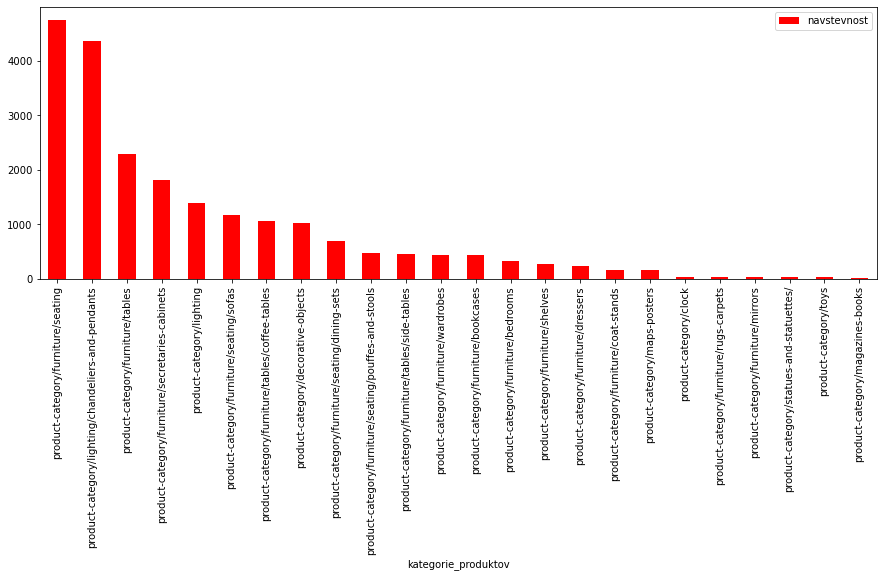

In [359]:
data= c.most_common()
df = pd.DataFrame(data=data, index=None, columns=['kategorie_produktov', 'navstevnost'])
df = df.drop(0)
df = df.drop(1)
df = df.drop(16)
df = df.drop(21)
df = df.drop(22)
df = df.drop(26)

plt.rcParams['figure.figsize'] = [15, 5]
df.plot(kind='bar',x='kategorie_produktov',y='navstevnost', color='red')
plt.savefig('navstevnost.png', bbox_inches='tight')



In [292]:
pocet_pouzivatelov = pristupy["User_id"].nunique()
pocet_pouzivatelov

13365

In [293]:
pocet_stranok = len(pristupy)
pocet_stranok

62966

In [294]:
priemerny_pocet_prezeranych_stranok_pouzivatelom = pocet_stranok/pocet_pouzivatelov
priemerny_pocet_prezeranych_stranok_pouzivatelom


4.7112607557052

In [295]:
pocet_sedeni = pristupy["Sedenie"].nunique()
pocet_sedeni

22954

In [296]:
priemerny_pocet_za_sedenie = 32710/6868
priemerny_pocet_za_sedenie

4.76266744321491

In [307]:
addtocart = pd.read_excel("add_to_cart.xlsx")

In [308]:
addtocart["User_id"].nunique()

200

In [310]:
orderreceived = pd.read_excel("order_received.xlsx")

In [361]:
list_of_words= orderreceived['Product_category']
from collections import Counter
c = Counter(list_of_words)
c.most_common()

[('product-catalogue', 332),
 (nan, 110),
 ('product-category/furniture/seating/dining-sets', 79),
 ('product-category/furniture/seating', 48),
 ('product-category/furniture/tables/coffee-tables', 41),
 ('checkout', 34),
 ('order-received', 31),
 ('product-category/furniture/secretaries-cabinets', 27),
 ('product-category/lighting', 16),
 ('product-category/lighting/chandeliers-and-pendants', 11),
 ('product-category/furniture/bookcases', 10),
 ('product-category/furniture/tables', 9),
 ('product-category/furniture/wardrobes', 6),
 ('product-category/decorative-objects', 5),
 ('product-category/furniture/dressers', 4),
 ('remove-item', 3),
 ('product-category/furniture/seating/sofas', 3),
 ('product-category/furniture/bedrooms', 2)]

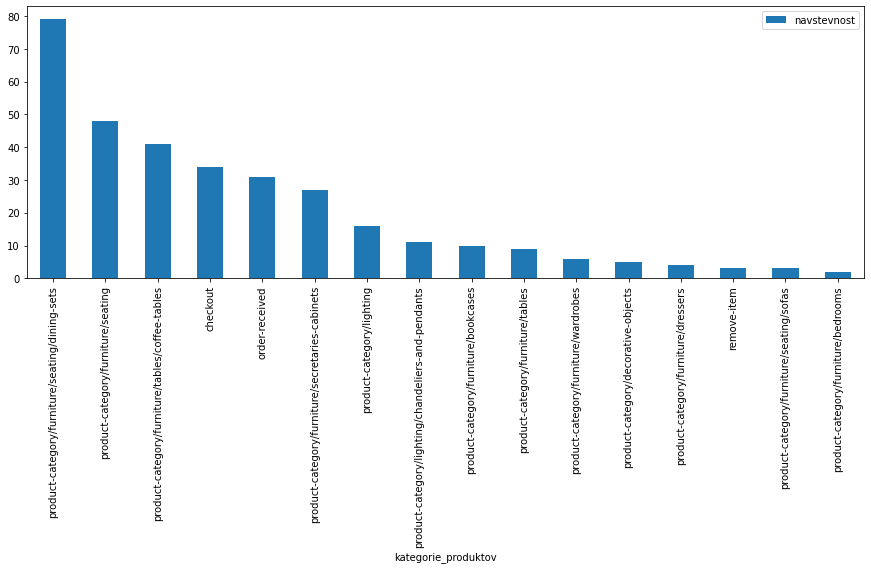

In [363]:
data= c.most_common()
df = pd.DataFrame(data=data, index=None, columns=['kategorie_produktov', 'navstevnost'])
df = df.drop(0)
df = df.drop(1)
plt.rcParams['figure.figsize'] = [15, 5]
df.plot(kind='bar',x='kategorie_produktov',y='navstevnost')
plt.savefig('objednavky.png', bbox_inches='tight')


In [380]:
dni = pd.read_excel("order_received.xlsx")

In [381]:
nakupy = dni[dni["Page"]=="order-received"]

In [382]:
list_of_words= nakupy['Den']
from collections import Counter
c = Counter(list_of_words)
c.most_common()

[('Pon', 7),
 ('Pia', 7),
 ('Ne', 6),
 ('Ut', 4),
 ('Str', 4),
 ('Stv', 2),
 ('So', 1)]

<ipython-input-383-67177b91deeb>:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "box_inches" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('nakupy.png', box_inches='tigh')


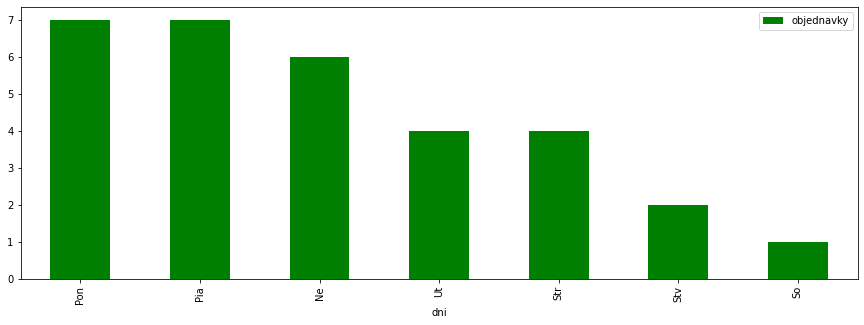

In [383]:
data= c.most_common()
df = pd.DataFrame(data=data, index=None, columns=['dni', 'objednavky'])
plt.rcParams['figure.figsize'] = [15, 5]
df.plot(kind='bar',x='dni',y='objednavky', color="green")
plt.savefig('nakupy.png', box_inches='tigh')

In [400]:
list_of_words= nakupy['Hodina']
from collections import Counter
c = Counter(list_of_words)
c.most_common()

[(19, 4),
 (23, 4),
 (21, 3),
 (8, 2),
 (15, 2),
 (12, 2),
 (13, 2),
 (11, 2),
 (18, 2),
 (2, 1),
 (1, 1),
 (14, 1),
 (22, 1),
 (20, 1),
 (16, 1),
 (9, 1),
 (0, 1)]

<ipython-input-401-91478b8a97ed>:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "box_inches" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('hodiny.png', box_inches='tigh')


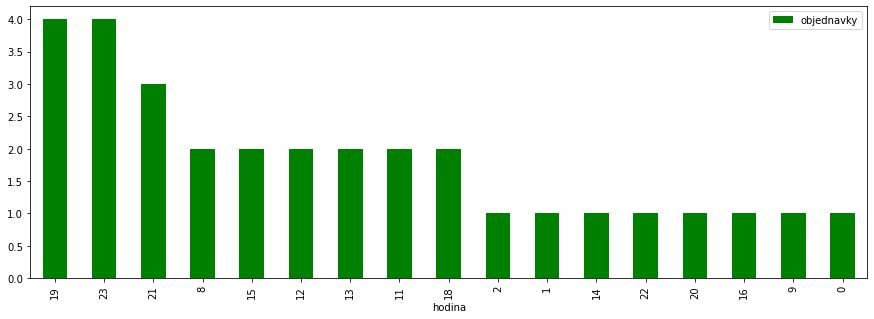

In [401]:
data= c.most_common()
df = pd.DataFrame(data=data, index=None, columns=['hodina', 'objednavky'])
plt.rcParams['figure.figsize'] = [15, 5]
df.plot(kind='bar',x='hodina',y='objednavky', color="green")
plt.savefig('hodiny.png', box_inches='tigh')

In [403]:
df = pd.read_excel("kategorizacia.xlsx")

In [385]:
list_of_words= df['Den']
from collections import Counter
c = Counter(list_of_words)
c.most_common()

[(2, 12490), (1, 10737), (7, 9427), (4, 7919), (5, 7070), (3, 6727), (6, 6722)]

<ipython-input-387-a9ee855015ea>:5: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "box_inches" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('navstevnost.png', box_inches='tigh')


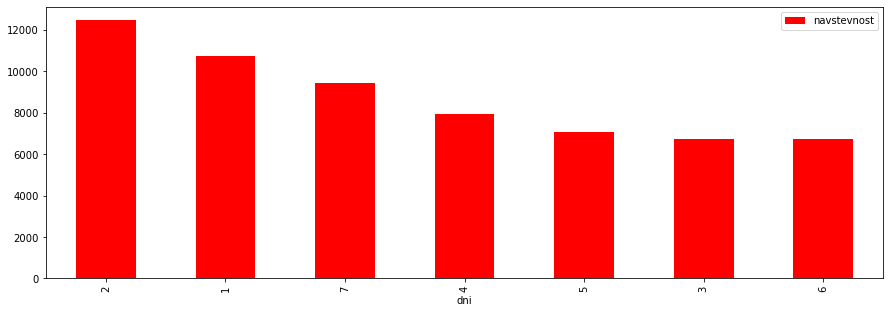

In [387]:
data= c.most_common()
df = pd.DataFrame(data=data, index=None, columns=['dni', 'navstevnost'])
plt.rcParams['figure.figsize'] = [15, 5]
df.plot(kind='bar',x='dni',y='navstevnost', color="red")
plt.savefig('navstevnost.png', box_inches='tigh')

In [404]:
list_of_words= df['hodina']
from collections import Counter
c = Counter(list_of_words)
c.most_common()

[(1, 4169),
 (22, 3185),
 (21, 2884),
 (19, 2849),
 (6, 2788),
 (15, 2755),
 (5, 2707),
 (14, 2696),
 (20, 2695),
 (18, 2679),
 (17, 2527),
 (7, 2480),
 (8, 2480),
 (23, 2432),
 (10, 2358),
 (4, 2340),
 (11, 2317),
 (16, 2270),
 (9, 2253),
 (13, 2161),
 (12, 2086),
 (2, 2011),
 (3, 2008),
 (0, 1962)]

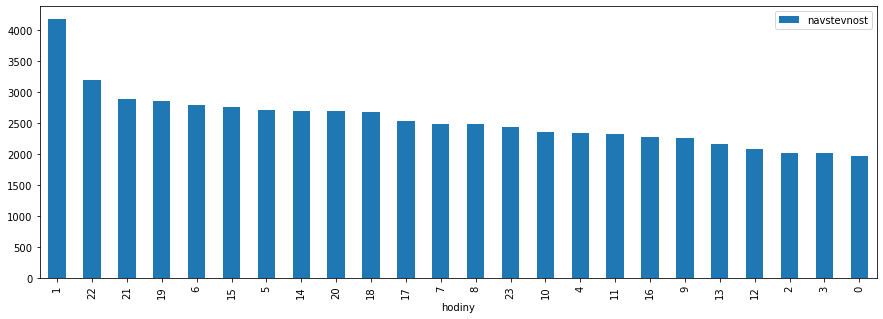

In [408]:
data= c.most_common()
df = pd.DataFrame(data=data, index=None, columns=['hodiny', 'navstevnost'])
plt.rcParams['figure.figsize'] = [15, 5]
df.plot(kind='bar',x='hodiny',y='navstevnost')
plt.savefig('hodiny1.png')